In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import interpolate

In [13]:
def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder {folder_path} created successfully.")
    else:
        print(f"Folder {folder_path} already exists.")


create_folder_if_not_exists("plots")
create_folder_if_not_exists("errors")

pi = np.double(np.pi)
interval_start = -2 * pi
interval_end = pi
base_domain = np.arange(interval_start, interval_end, 0.00943)


def function_given(x):
    n = 12
    m = 14
    return x ** n - (1 - x) ** m


def first_derivative(x):
    n = 12
    m = 14
    return n * x ** (n - 1) + m * (1 - x) ** (m - 1)

Folder plots already exists.
Folder errors already exists.


**Równomierna dystrybucja**

In [6]:
def even_domain(x_min, x_max, number_of_points):
    return np.linspace(x_min, x_max, number_of_points, dtype=np.double)

**Wizualizacja**

In [7]:
def visualise(domain=None, nodes_x=None, nodes_y=None, f_y=None, Pn_x=None, title=None, x_size=8, y_size=6,
              plot_title=None,
              filename=None):
    '''
    :param domain: array of float64, of x coordinates of points to visualise
    :param nodes_x: array of x coordinates of nodes
    :param nodes_y: array of f(x) for each x in nodes_x
    :param f_y: array of f(x) for each x in domain
    :param Pn_x: array of Pn(x) for each x in domain
    :param title: a string
    :param x_size: size of a figure in x axis
    :param y_size: size of a figure in y axis
    :param plot_title: title of a plot
    :param filename: name of a file to save a figure
    :return: None
    '''
    plt.figure(figsize=(x_size, y_size))
    if nodes_x is not None and nodes_y is not None:
        plt.scatter(nodes_x, nodes_y, label="Węzły", color="green")
    if f_y is not None:
        plt.plot(domain, f_y, label="Zadana funckcja", color="blue")

    if title is not None:
        plt.plot(domain, Pn_x, label=title, color="red")
    if plot_title is not None:
        plt.title(plot_title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    if filename is not None:
        plt.savefig(f"plots/{filename}.png", dpi=300, format='png')
    plt.show()

**Implementacja funkcji do laboratorium**

In [11]:
function_given_values = []
for random_name in range(len(base_domain)):
    function_given_values.append(function_given(base_domain[random_name]))


def get_function_values(X):
    result = np.zeros(len(X), dtype=np.double)
    for i in range(len(X)):
        result[i] = function_given(X[i])
    return result


def diff_stop_cond(x1, x0, e):
    return abs(x1 - x0) < e


def value_stop_cond(x, _x, e):
    return abs(function_given(x)) < 0

**Metoda Newtona**

In [12]:
def newton_method(x_start, p, stop_crt):
    if function_given(x_start) < p:
        return 0, x_start
    for iter_counter in range(int(10e6)):
        x_next = x_start - function_given(x_start) / first_derivative(x_start)
        if stop_crt(x_next, x_start, p):
            return iter_counter + 1, x_next
        x_start = x_next
    return False, x_start

**Metoda stycznych**

In [ ]:
def secant_method(x0, x1, e, stop_crt):
    def get_next_sqrt_approx():
        nonlocal x0, x1
        if function_given(x1) - function_given(x0) == 0:
            return False
        return x1 - (x1 - x0) / (function_given(x1) - function_given(x0)) * function_given(x1)
    for iter_counter in range(int(10e6)):
        x0, x1 = x1, get_next_sqrt_approx()
        if x1 is False:
            return False, x0
        if stop_crt(x0, x1, e):
            return iter_counter + 1, x1
    return False, x1


**Wykonanie ćwiczenia**

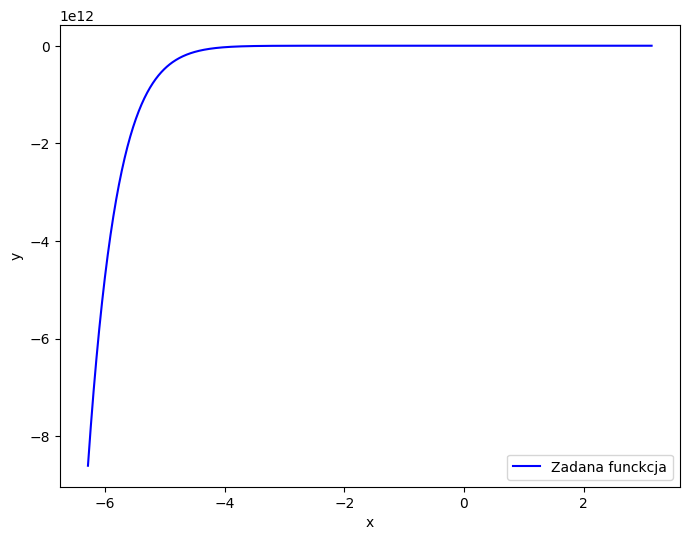

In [14]:
visualise(base_domain, None, None, function_given_values)

In [ ]:
import csv


def save_to_csv(filename, data):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [ ]:
def approximation_results_errors():
    global given_number_of_nodes
    csv_header = ["n", "m", "błąd maksymalny", "błąd kwadratowy"]
    csv_file = [csv_header]
    for number_of_nodes in given_number_of_nodes:
        for cur_degree in given_poly_degree:
            csv_record = [number_of_nodes, cur_degree]
            even_nodes = even_domain(x_min=interval_start, x_max=interval_end, number_of_points=number_of_nodes)
            exact_result = function_given_values

            poly_approximation_result = trigonometric_approximation(function=function_given,
                                                                    domain=base_domain,
                                                                    x_zeroes=even_nodes,
                                                                    poly_degree=cur_degree)
            poly_approximation_abs_error = get_abs_error(exact_result, poly_approximation_result)
            csv_record.append(poly_approximation_abs_error)
            poly_approximation_result_sqrt_error = get_square_mean_error(exact_result, poly_approximation_result)
            csv_record.append(poly_approximation_result_sqrt_error)
            csv_file.append(csv_record)
        save_to_csv("errors/poly_approx_errors.csv", csv_file)


approximation_results_errors()  #%% md
** Wykonanie
ćwiczenia **

In [ ]:
visualise(base_domain, None, None, function_given_values)

In [ ]:
tmp = 7
range_length = interval_start - interval_end
tmp /= range_length
tmp *= 2 * np.pi
tmp += -np.pi - (2 * np.pi * interval_start / range_length)
tmp

In [ ]:
given_number_of_nodes = [3, 5, 7, 10, 15, 20, 25, 30, 35, 50]
given_poly_degree = [2, 3, 5, 10, 15]

print(len(given_number_of_nodes))
print(len(given_poly_degree))


def get_all_visualisations(number, degree):
    if degree > (number - 1) // 2:
        #print("Nie można wyznaczyć wielomianu o stopniu większym niż (n-1)/2")
        return

    print("Liczba węzłów: ", number, " stopień wielomianu: ", degree)
    visualise_approximation(number_of_nodes=number,
                            domain=base_domain,
                            function=function_given,
                            poly_degree=degree,
                            filename=f"n_{number}_m_{degree}")


for number in given_number_of_nodes:
    for degree in given_poly_degree:
        get_all_visualisations(number, degree)

In [ ]:
import csv


def save_to_csv(filename, data):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [ ]:
def approximation_results_errors():
    global given_number_of_nodes
    csv_header = ["n", "m", "błąd maksymalny", "błąd kwadratowy"]
    csv_file = [csv_header]
    for number_of_nodes in given_number_of_nodes:
        for cur_degree in given_poly_degree:
            csv_record = [number_of_nodes, cur_degree]
            even_nodes = even_domain(x_min=interval_start, x_max=interval_end, number_of_points=number_of_nodes)
            exact_result = function_given_values

            poly_approximation_result = trigonometric_approximation(function=function_given,
                                                                    domain=base_domain,
                                                                    x_zeroes=even_nodes,
                                                                    poly_degree=cur_degree)
            poly_approximation_abs_error = get_abs_error(exact_result, poly_approximation_result)
            csv_record.append(poly_approximation_abs_error)
            poly_approximation_result_sqrt_error = get_square_mean_error(exact_result, poly_approximation_result)
            csv_record.append(poly_approximation_result_sqrt_error)
            csv_file.append(csv_record)
        save_to_csv("errors/poly_approx_errors.csv", csv_file)


approximation_results_errors()